<a href="https://colab.research.google.com/github/farahwadya/Abalone-Pre-Preprocessing/blob/main/Abalone_Pre_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

# uploading dataset

In [3]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Week05/Data/abalone.csv'
df=pd.read_csv(fpath)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.shape

(4177, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
#Check the data types and convert dtypes, if needed.
df.dtypes

,0
sex,object
length,float64
diameter,float64
height,float64
whole_weight,float64
shucked_weight,float64
viscera_weight,float64
shell_weight,float64
rings,int64


In [8]:
df.isna().sum() #Check for null values and impute them if needed. (Impute them in a way that prevents data leakage!)


,0
sex,0
length,0
diameter,0
height,0
whole_weight,0
shucked_weight,0
viscera_weight,0
shell_weight,0
rings,0


In [10]:
df.duplicated().sum() #Column for duplicate rows and address them, if needed.


np.int64(0)

In [11]:
df['sex'].unique() #Check for inconsistent categories and fix them if needed.

array(['M', 'F', 'I'], dtype=object)

In [15]:
#Check for impossible numeric values and fix them, if needed,
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


the data seems to be cleaned no nulls no duplicates no inconcistencies

# Data exploration

Perform basic EDA on the entire dataframe

count plot to show number of different gendar

/tmp/ipython-input-3990371614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sex", palette="Set2")


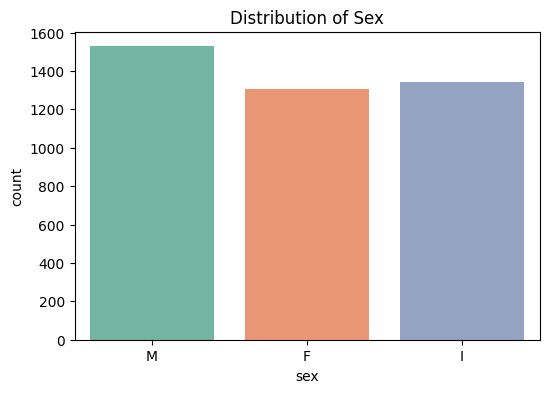

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex", palette="Set2")
plt.title("Distribution of Sex")
plt.show()

regplot show the relation between rings and the other numeric features

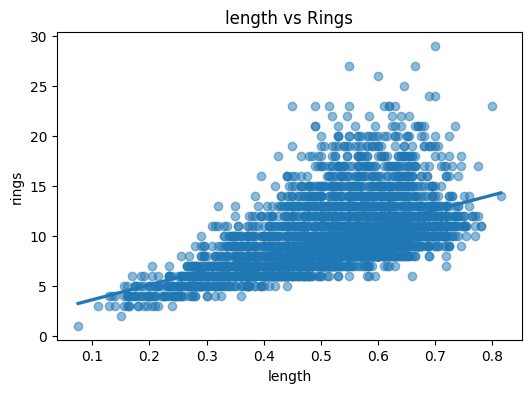

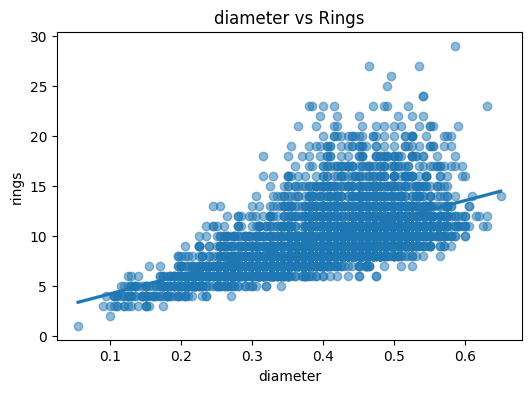

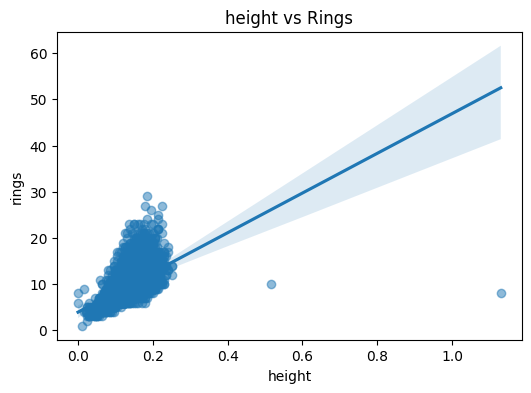

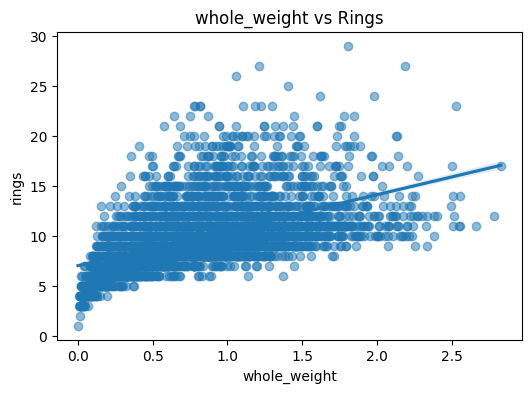

In [26]:
features = ["length", "diameter", "height", "whole_weight"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x=col, y="rings", scatter_kws={"alpha":0.5})
    plt.title(f"{col} vs Rings")
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


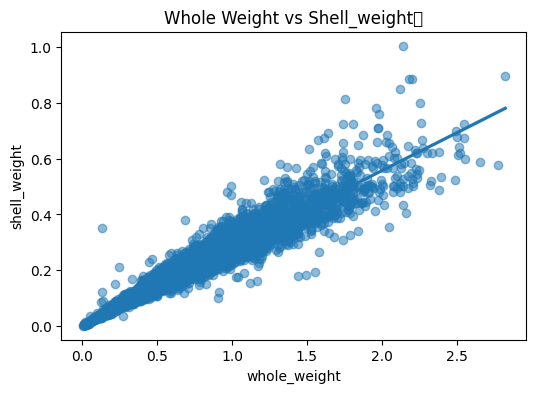

In [31]:
plt.figure(figsize=(6,4))
sns.regplot(data=df, x="whole_weight", y="shell_weight", scatter_kws={"alpha":0.5})
plt.title("Whole Weight vs Shell_weight")
plt.show()


the plot show a positive corellation between whole weight and shell weight

# prepare data for modeling

In [16]:
#Separate your data into the feature matrix (X) and the target vector (y)
#rings will be your y
#The rest of the features will be your X
X=df.drop(columns='rings')
y=df['rings']

In [18]:
#Train/test split the data. Please use the random number 42 for consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a ColumnTransformer to preprocess the data.Remember to:
- Create lists of column names for numeric and categorical columns.
- Create a StandardScaler for scaling numeric columns.
- Create a OneHotEncoder for one-hot encoding the categorical columns.
- Create a tuple for each transformer with the: name, the transformer object, and the list of columns.
- Use the tuples to create a ColumnTransformer to preprocess the data.
- Make sure to set verbose_feature_names_out to False!

In [21]:
#Create lists of column names for numeric and categorical columns.
cat_cols=make_column_selector(dtype_include='object')(X_train)
cat_cols
num_cols=make_column_selector(dtype_include='number')(X_train)
num_cols

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight']

## nominal data pipelines

In [24]:
cat_impute=SimpleImputer(strategy='most_frequent')
cat_scaler=OneHotEncoder(sparse_output=False,handle_unknown='ignore') #Create a OneHotEncoder
cat_pipe=make_pipeline(cat_impute,cat_scaler)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [32]:
cat_tuple = ('categorical',cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['sex'])

## numeric features

In [27]:
num_impute=SimpleImputer(strategy='mean')
num_scaler=StandardScaler() #Create a StandardScaler
num_pipe=make_pipeline(num_impute,num_scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### creating tuples

In [33]:
#Create a tuple for each transformer with the: name, the transformer object, and the list of columns.
num_tuple=('numeric',num_pipe,num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 ['length',
  'diameter',
  'height',
  'whole_weight',
  'shucked_weight',
  'viscera_weight',
  'shell_weight'])

In [41]:
col_transformer = ColumnTransformer([cat_tuple, num_tuple],
                                 verbose_feature_names_out=False)
col_transformer


ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex']),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['length', 'diameter', 'height',
                                  'whole_weight', 'shucked_weight',
                                  'viscera_weight', 'shell_weight'])],
                  verbose_feature_names_out=False)

 Fit the ColumnTransformer on your training data.


In [42]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex']),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['length', 'diameter', 'height',
                                  'whole_weight', 'shucked_weight',
                                  'viscera_weight', 'shell_weight'])],
                  verbose_feature_names_out=False)

In [43]:
#Transform the training and test data and save them as new variables, named appropriately (e.g., X_train_tf/X_train_processed, X_test_tf/X_test_processed.
X_train_processed=col_transformer.transform(X_train)
X_train_processed

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
4038,0.0,1.0,0.0,0.210175,0.369725,-0.347950,-0.323164,-0.325407,-0.405130,-0.212132
1272,0.0,1.0,0.0,-0.419444,-0.542386,-0.936082,-0.665985,-0.480126,-0.820932,-0.712419
3384,1.0,0.0,0.0,-1.846581,-1.859881,-1.641840,-1.388250,-1.354628,-1.346395,-1.391379
3160,0.0,1.0,0.0,-2.098428,-2.113245,-1.759467,-1.453355,-1.363597,-1.533734,-1.462848
3894,0.0,0.0,1.0,-0.251546,-0.289022,-0.112697,-0.409632,-0.437522,-0.350299,-0.176398
...,...,...,...,...,...,...,...,...,...,...
3444,1.0,0.0,0.0,-0.293521,-0.086330,-0.583203,-0.532723,-0.468915,-0.441684,-0.676684
466,1.0,0.0,0.0,1.217565,1.433855,1.181193,1.138658,0.815929,1.120999,1.145788
3092,0.0,0.0,1.0,-0.125622,-0.137003,-0.347950,-0.509325,-0.522730,-0.432545,-0.369365
3772,0.0,0.0,1.0,0.420048,0.572417,-0.465577,0.453016,0.697087,0.344227,-0.033459


In [44]:
#Transform the training and test data and save them as new variables, named appropriately (e.g., X_train_tf/X_train_processed, X_test_tf/X_test_processed.
X_test_processed=col_transformer.transform(X_test)
X_test_processed

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
866,0.0,0.0,1.0,0.671895,0.471071,0.475434,0.554743,0.271048,1.102722,0.609767
1483,0.0,0.0,1.0,0.545971,0.319052,0.240182,0.084763,0.118571,0.312242,0.038011
599,1.0,0.0,0.0,0.294124,0.369725,1.298819,0.305511,-0.249168,0.399058,0.681236
1702,1.0,0.0,0.0,0.923743,0.825781,0.710687,0.876201,0.797991,0.782875,1.002849
670,0.0,0.0,1.0,-0.419444,-0.238349,0.122555,-0.434047,-0.563092,-0.665577,-0.176398
...,...,...,...,...,...,...,...,...,...,...
3093,1.0,0.0,0.0,-0.041673,0.217707,0.240182,-0.209230,-0.262622,-0.213222,-0.033459
1651,1.0,0.0,0.0,0.587946,0.268380,0.240182,0.140713,0.255352,-0.098990,0.180950
2897,0.0,1.0,0.0,0.168200,0.217707,0.240182,-0.180746,-0.036149,-0.208652,-0.226426
3953,0.0,1.0,0.0,-0.503394,-0.542386,-0.465577,-0.509325,-0.473399,-0.816362,-0.397953
